# Dataset Retrieval


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('/content/drive/MyDrive/Big Data Processing/Popular_Spotify_Songs.csv', encoding='latin1') -> bram

# sebas
df = pd.read_csv('/content/drive/MyDrive/Popular_Spotify_Songs.csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Data Cleaning


In [ ]:
# Menghitung row yang null
print("Null rows:\n", df.isnull().sum(), "\n")

print("Duplicate rows: ", df.duplicated().sum())

Null rows:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64 

Duplicate rows:  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
if 'key' in df.columns:
  df = df.drop(columns=['key'])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,826,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,382,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,949,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,548,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,425,144,Minor,65,23,80,14,63,11,6


In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Music_Cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,Major,80,89,83,31,0,8,4,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,Major,71,61,74,7,0,10,4,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,Major,51,32,53,17,0,31,6,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,Major,55,58,72,11,0,11,15,2
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,Minor,65,23,80,14,63,11,6,4


# Exploratory Data Analysis


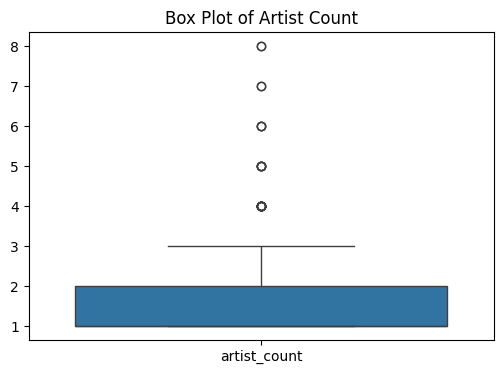

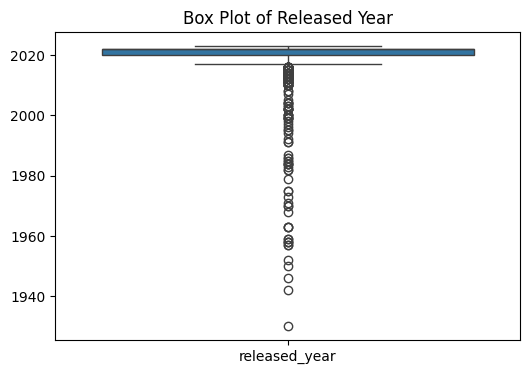

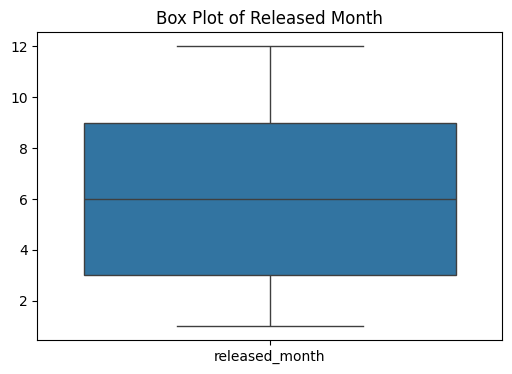

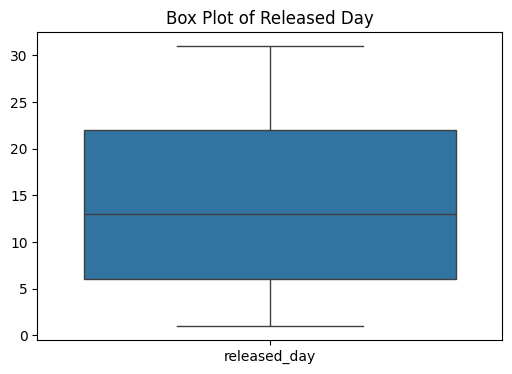

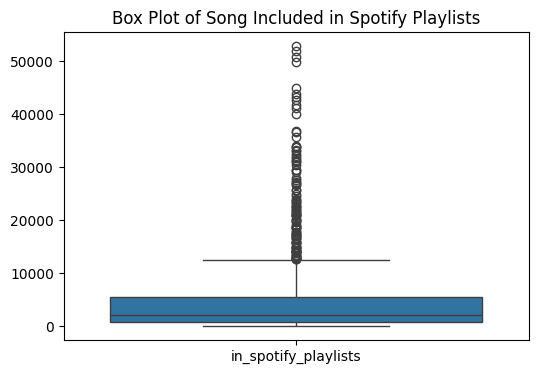

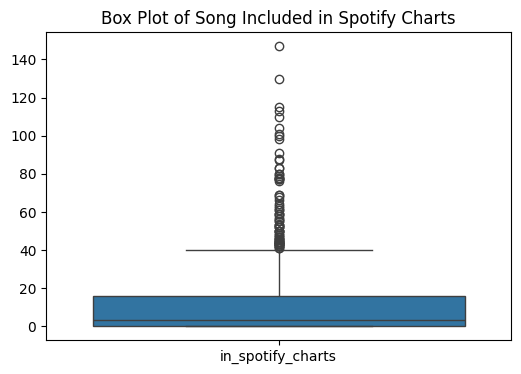

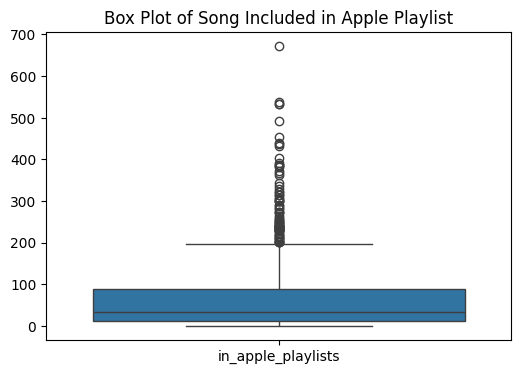

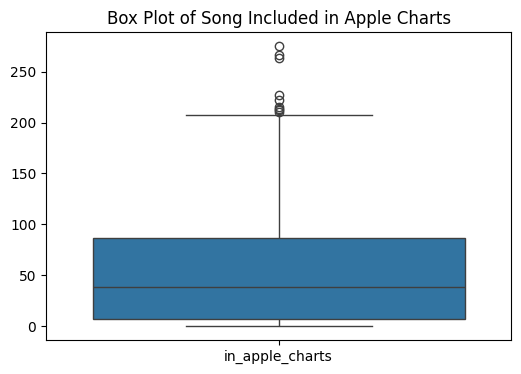

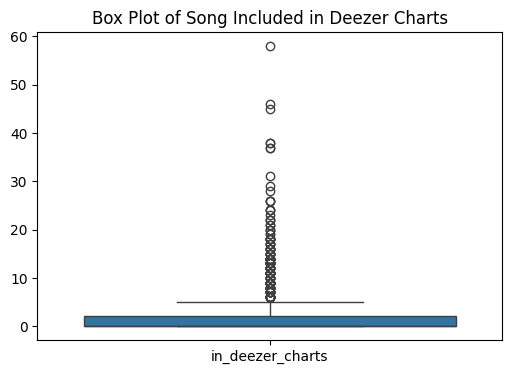

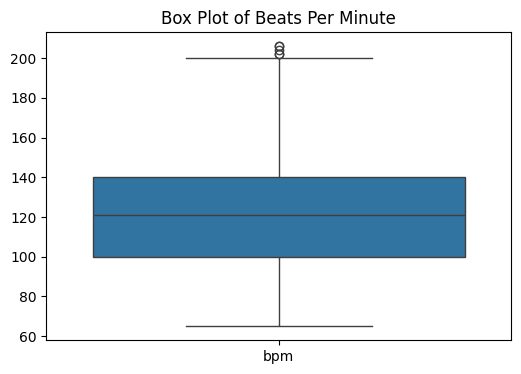

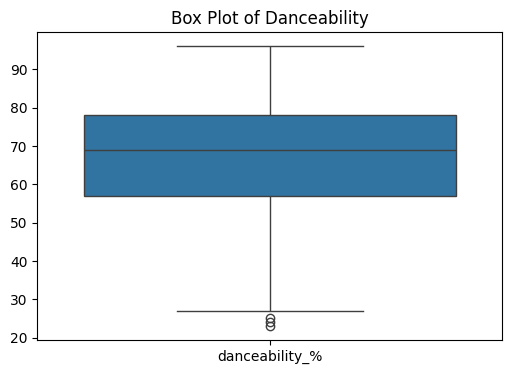

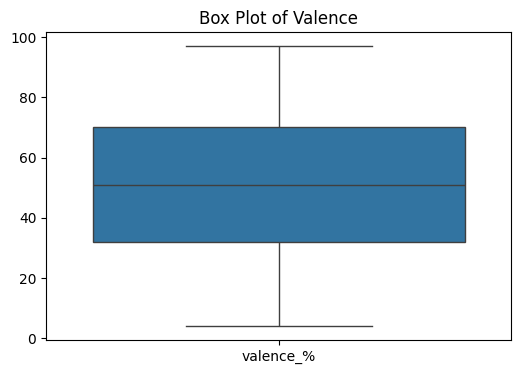

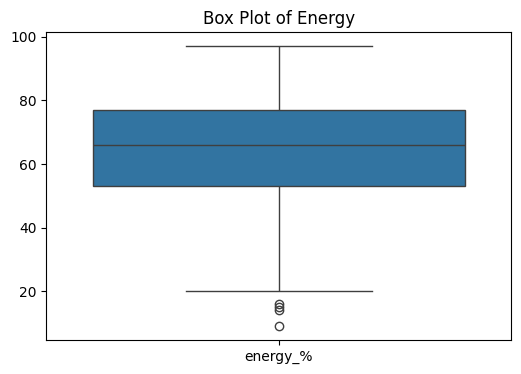

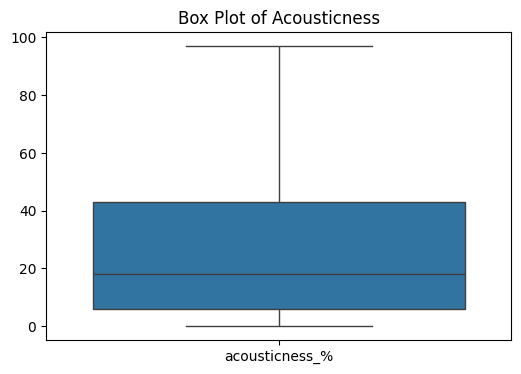

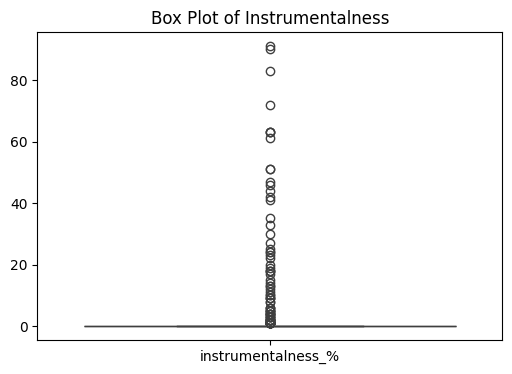

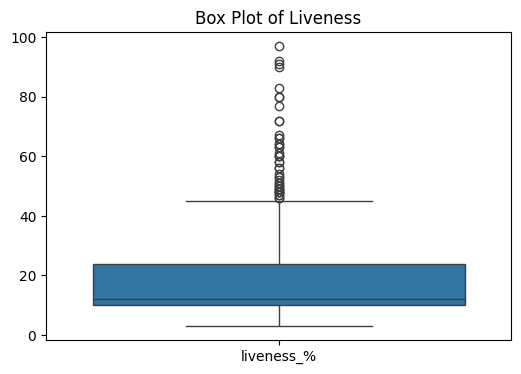

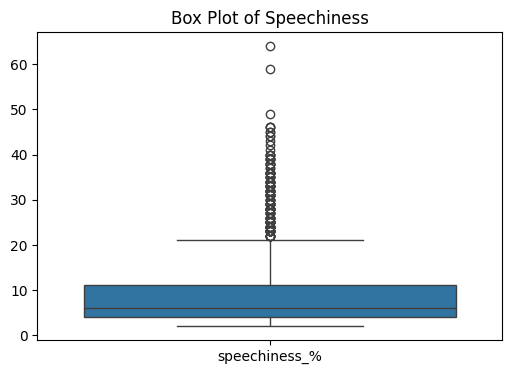

In [ ]:
# Membuat box plot untuk masing - masing atribut yang numerik
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['artist_count']])
plt.title('Box Plot of Artist Count')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['released_year']])
plt.title('Box Plot of Released Year')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['released_month']])
plt.title('Box Plot of Released Month')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['released_day']])
plt.title('Box Plot of Released Day')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['in_spotify_playlists']])
plt.title('Box Plot of Song Included in Spotify Playlists')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['in_spotify_charts']])
plt.title('Box Plot of Song Included in Spotify Charts')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['in_apple_playlists']])
plt.title('Box Plot of Song Included in Apple Playlist')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['in_apple_charts']])
plt.title('Box Plot of Song Included in Apple Charts')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['in_deezer_charts']])
plt.title('Box Plot of Song Included in Deezer Charts')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['bpm']])
plt.title('Box Plot of Beats Per Minute')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['danceability_%']])
plt.title('Box Plot of Danceability')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['valence_%']])
plt.title('Box Plot of Valence')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['energy_%']])
plt.title('Box Plot of Energy')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['acousticness_%']])
plt.title('Box Plot of Acousticness')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['instrumentalness_%']])
plt.title('Box Plot of Instrumentalness')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['liveness_%']])
plt.title('Box Plot of Liveness')
plt.show()

print("\n")

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['speechiness_%']])
plt.title('Box Plot of Speechiness')
plt.show()

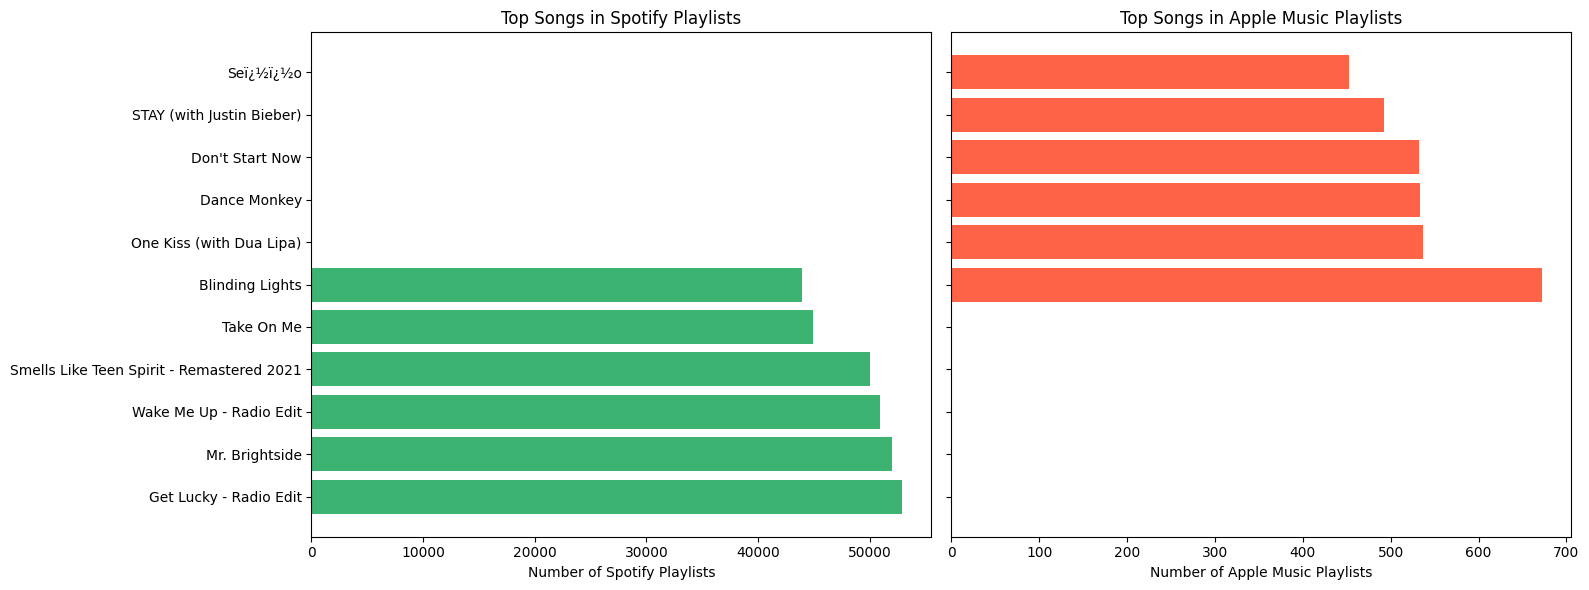

In [ ]:
top_spotify = df[df['in_spotify_playlists'].notna()] \
             .sort_values('in_spotify_playlists', ascending=False) \
             [['track_name', 'artist(s)_name', 'streams', 'in_spotify_playlists']] \
             .head(6) \
             .reset_index(drop=True)


top_apple = df[df['in_apple_playlists'].notna()] \
             .sort_values('in_apple_playlists', ascending=False) \
             [['track_name', 'artist(s)_name', 'streams', 'in_apple_playlists']] \
             .head(6) \
             .reset_index(drop=True)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Spotify Chart
axs[0].barh(top_spotify['track_name'], top_spotify['in_spotify_playlists'], color='mediumseagreen')
axs[0].set_title('Top Songs in Spotify Playlists')
axs[0].set_xlabel('Number of Spotify Playlists')
axs[0].invert_yaxis()

# Apple Music Chart
axs[1].barh(top_apple['track_name'], top_apple['in_apple_playlists'], color='tomato')
axs[1].set_title('Top Songs in Apple Music Playlists')
axs[1].set_xlabel('Number of Apple Music Playlists')
axs[1].invert_yaxis()

plt.tight_layout()


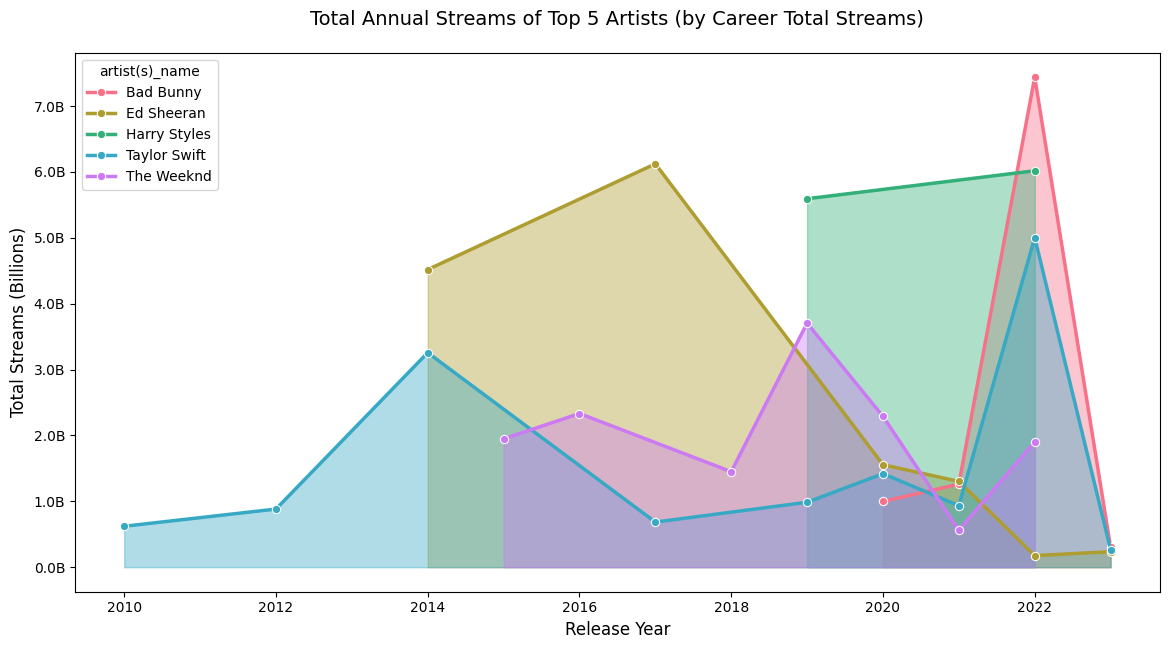

In [ ]:
top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(5).index

artist_year_streams = df[df['artist(s)_name'].isin(top_artists)]\
    .groupby(['artist(s)_name', 'released_year'])['streams']\
    .sum()\
    .reset_index()\
    .sort_values(['artist(s)_name', 'released_year'])

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=artist_year_streams,
    x='released_year',
    y='streams',
    hue='artist(s)_name',
    marker='o',
    linewidth=2.5,
    palette='husl',
    estimator=None
)
artists = artist_year_streams['artist(s)_name'].unique()
palette = sns.color_palette('husl', len(artists))
artist_colors = dict(zip(artists, palette))
for artist in artists:
    data = artist_year_streams[artist_year_streams['artist(s)_name'] == artist]
    plt.fill_between(data['released_year'], data['streams'], alpha=0.4, color=artist_colors[artist])
plt.title('Total Annual Streams of Top 5 Artists (by Career Total Streams)', fontsize=14, pad=20)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Streams (Billions)', fontsize=12)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x/1e9:.1f}B"))


Selected features for clustering:
   valence_%  danceability_%  energy_%  acousticness_%  instrumentalness_%  \
0         89              80        83              31                   0   
1         61              71        74               7                   0   
2         32              51        53              17                   0   
3         58              55        72              11                   0   
4         23              65        80              14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  
--------------------------------------------------

Scaled data head:
   valence_%  danceability_%  energy_%  acousticness_%  instrumentalness_%  \
0   1.600828        0.891096  1.131729        0.151729           -0.188132   
1   0.407730        0.275624  0.587654       -0.771972           -0.188132   
2  -0.8

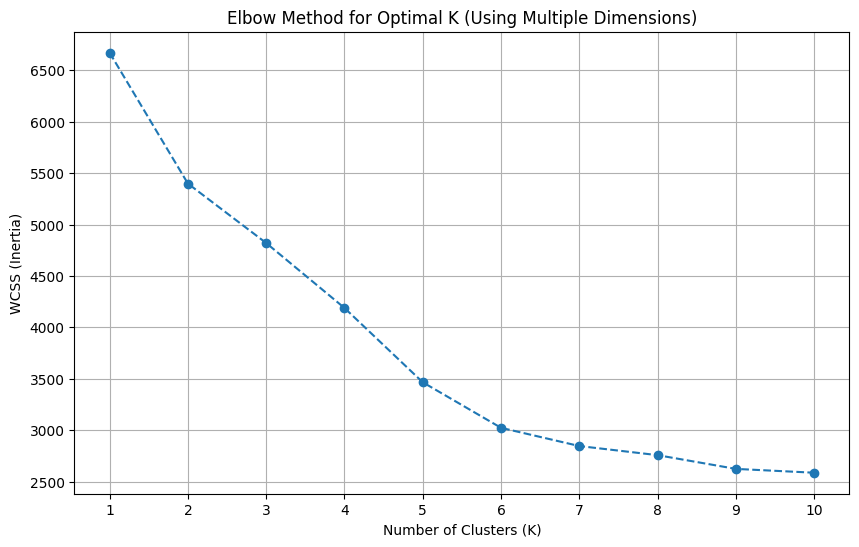


--- Elbow Method Plot Displayed ---
Observe the plot above and look for the 'elbow point' where the decrease in WCSS starts to slow down significantly.
This point suggests an optimal number of clusters. Clustering is now based on all selected features.
--------------------------------------------------

DataFrame with 'Music_Cluster' labels (K=6):
                            track_name  valence_%  danceability_%  \
0  Seven (feat. Latto) (Explicit Ver.)         89              80   
1                                 LALA         61              71   
2                              vampire         32              51   
3                         Cruel Summer         58              55   
4                       WHERE SHE GOES         23              65   

   Music_Cluster  
0              0  
1              0  
2              2  
3              2  
4              4  
--------------------------------------------------

--- Visualizing Clusters with PCA (2D) ---


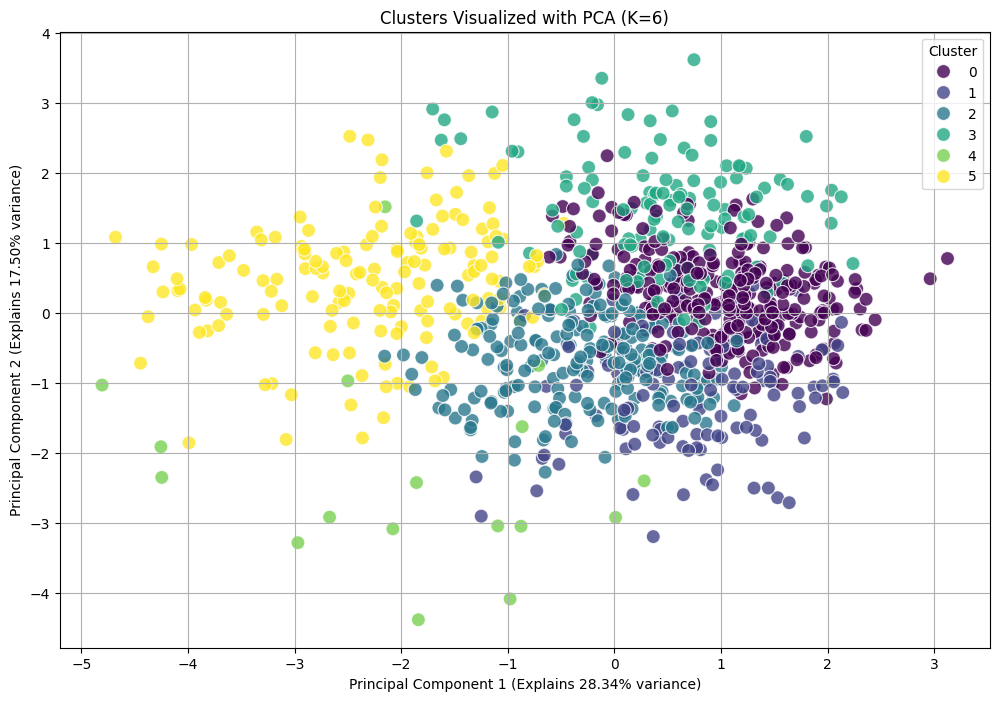

Total variance explained by 2 PCs: 45.85%
PCA helps visualize the separation of clusters in a lower-dimensional space that captures the most data variance.
--------------------------------------------------

--- Visualizing Clusters with Scatter Plot Matrix (Pair Plot) ---
This might take a moment to generate if you have many features or data points.


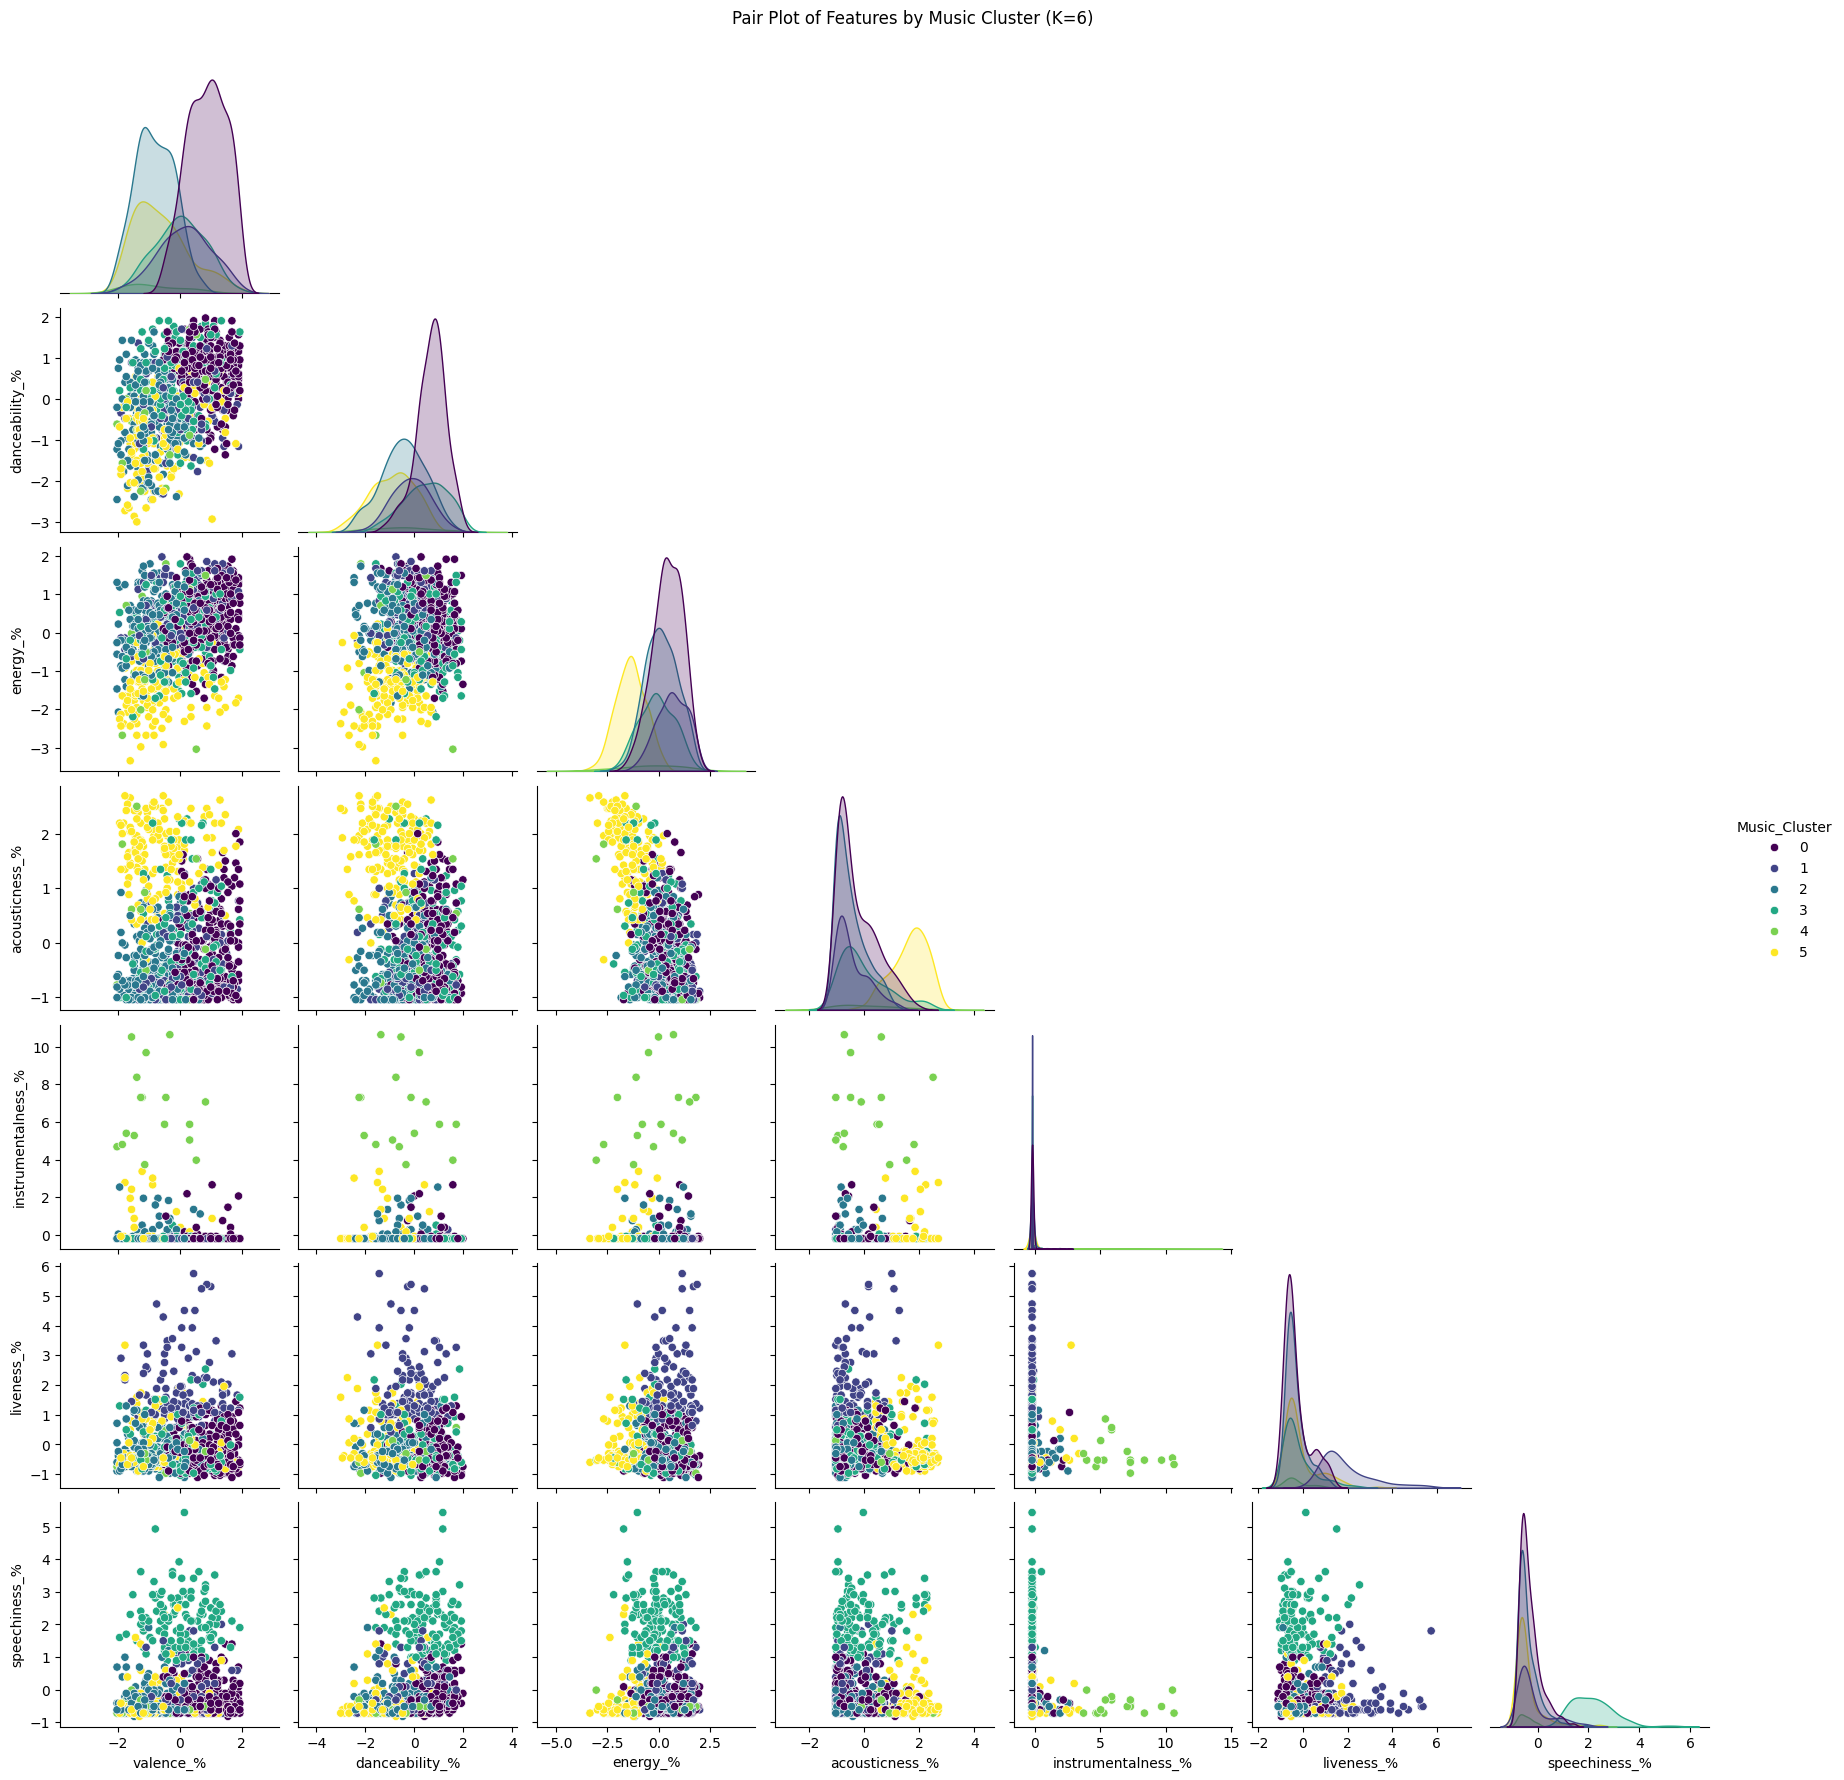

The Scatter Plot Matrix shows pairwise relationships between features, colored by cluster.
Look for pairs of features that show good separation between the clusters.
--------------------------------------------------

Average feature values for each cluster:
               valence_%  danceability_%   energy_%  acousticness_%  \
Music_Cluster                                                         
0              71.857143       76.805195  71.217532       20.103896   
1              55.135593       64.788136  74.762712       15.338983   
2              32.590308       60.427313  66.220264       13.920705   
3              51.682171       73.612403  62.449612       26.364341   
4              32.235294       60.352941  58.647059       31.000000   
5              37.422078       53.779221  41.662338       69.454545   

               instrumentalness_%  liveness_%  speechiness_%  
Music_Cluster                                                 
0                        0.389610   13.909091 

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # Import PCA

# Select and Prepare Features
features_for_clustering = [
    'valence_%',
    'danceability_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]
X = df[features_for_clustering]

print("Selected features for clustering:")
print(X.head())
print("-" * 50)

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
print("\nScaled data head:")
print(X_scaled_df.head())
print("-" * 50)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (Using Multiple Dimensions)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


optimal_k = 6

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
cluster_labels = kmeans_final.fit_predict(X_scaled)

df['Music_Cluster'] = cluster_labels
X_scaled_df['Music_Cluster'] = cluster_labels # Also add to scaled data for convenience

print(f"\nDataFrame with 'Music_Cluster' labels (K={optimal_k}):")
display_cols = ['track_name'] + features_for_clustering[:2] + ['Music_Cluster']
print(df[display_cols].head())
print("-" * 50)

# Visualize Clusters using PCA (Principal Component Analysis)
print("\n--- Visualizing Clusters with PCA (2D) ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Music_Cluster'] = cluster_labels

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Music_Cluster',
                data=pca_df, palette='viridis', s=100, alpha=0.8, legend='full')
plt.title(f'Clusters Visualized with PCA (K={optimal_k})')
plt.xlabel(f'Principal Component 1 (Explains {pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 (Explains {pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print(f"Total variance explained by 2 PCs: {sum(pca.explained_variance_ratio_):.2%}")
print("PCA helps visualize the separation of clusters in a lower-dimensional space that captures the most data variance.")
print("-" * 50)


# Visualize Clusters using a Scatter Plot Matrix (Pair Plot)
pair_plot_df = X_scaled_df

# To avoid plotting the 'Music_Cluster' column against itself if it were a feature:
features_for_pairplot = [col for col in pair_plot_df.columns if col != 'Music_Cluster']

# Create the pair plot
pair_plot_figure = sns.pairplot(pair_plot_df, vars=features_for_pairplot, hue='Music_Cluster',
                                palette='viridis', diag_kind='kde', corner=True)
pair_plot_figure.fig.suptitle(f'Pair Plot of Features by Music Cluster (K={optimal_k})', y=1.02) # Adjust title position
plt.show()

print("The Scatter Plot Matrix shows pairwise relationships between features, colored by cluster.")
print("Look for pairs of features that show good separation between the clusters.")
print("-" * 50)

# Characterize each cluster
print("\nAverage feature values for each cluster:")
print(df.groupby('Music_Cluster')[features_for_clustering].mean())
print("-" * 50)

print("\nNumber of songs in each cluster:")
print(df['Music_Cluster'].value_counts().sort_index())
print("-" * 50)

In [ ]:
import numpy as np


streams_column = 'streams'

# Check if the streams column exists in the DataFrame
if streams_column in df.columns:
    # Calculate the average streams per cluster and convert to whole numbers
    average_streams_per_cluster = df.groupby('Music_Cluster')[streams_column].mean().astype(np.int64).sort_values(ascending=False)

    print(f"\nAverage '{streams_column}' per Music Cluster (Whole Numbers):")
    print(average_streams_per_cluster)
    print("-" * 50)


    cluster_names_map = {
        0: "Upbeat & Joyful Dance Hits",
        1: "High-Energy Live Performances",
        2: "Intense & Brooding Rhythmic Tracks",
        3: "Rhythmic & Speech-Driven Grooves",
        4: "Atmospheric & Melancholic Instrumentals",
        5: "Mellow & Reflective Acoustic Pieces"
    }

    average_streams_df = average_streams_per_cluster.reset_index()
    average_streams_df['Cluster_Name'] = average_streams_df['Music_Cluster'].map(cluster_names_map)

    print("\nAverage streams with Cluster Names (Whole Numbers):")
    # Reorder columns for clarity if desired and sort
    final_display_df = average_streams_df[['Music_Cluster', 'Cluster_Name', streams_column]].sort_values(by=streams_column, ascending=False)
    print(final_display_df)
    print("-" * 50)

else:
    print(f"Error: Column '{streams_column}' not found in the DataFrame.")
    print("Please ensure your DataFrame has a column with stream counts and update the 'streams_column' variable.")


Average 'streams' per Music Cluster (Whole Numbers):
Music_Cluster
5    581635370
2    539048559
0    533662613
1    495382415
3    382790853
4    344317106
Name: streams, dtype: int64
--------------------------------------------------

Average streams with Cluster Names (Whole Numbers):
   Music_Cluster                             Cluster_Name    streams
0              5      Mellow & Reflective Acoustic Pieces  581635370
1              2       Intense & Brooding Rhythmic Tracks  539048559
2              0               Upbeat & Joyful Dance Hits  533662613
3              1            High-Energy Live Performances  495382415
4              3         Rhythmic & Speech-Driven Grooves  382790853
5              4  Atmospheric & Melancholic Instrumentals  344317106
--------------------------------------------------


In [ ]:
import numpy as np

track_name_column = 'track_name'
streams_column = 'streams'

cluster_names_map = {
    0: "Upbeat & Joyful Dance Hits",
    1: "High-Energy Live Performances",
    2: "Intense & Brooding Rhythmic Tracks",
    3: "Rhythmic & Speech-Driven Grooves",
    4: "Atmospheric & Melancholic Instrumentals",
    5: "Mellow & Reflective Acoustic Pieces"
}

# Check if necessary columns exist
if not all(col in df.columns for col in ['Music_Cluster', track_name_column, streams_column]):
    print(f"Error: Ensure your DataFrame 'df' contains 'Music_Cluster', '{track_name_column}', and '{streams_column}' columns.")
else:
    print("\n--- Top 5 Songs in Each Cluster (by Streams) ---")

    # Get unique cluster labels and sort them for consistent output order
    unique_clusters = sorted(df['Music_Cluster'].unique())

    for cluster_label in unique_clusters:
        cluster_name = cluster_names_map.get(cluster_label, f"Cluster {cluster_label}")
        print(f"\n--- {cluster_name} (Cluster {cluster_label}) ---")

        # Filter DataFrame for the current cluster
        cluster_data = df[df['Music_Cluster'] == cluster_label].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Get the top 5 songs by streams for this cluster
        # Ensure streams are numeric before using nlargest
        cluster_data[streams_column] = pd.to_numeric(cluster_data[streams_column], errors='coerce')
        top_5_songs = cluster_data.nlargest(5, streams_column)

        if top_5_songs.empty:
            print("No songs found for this cluster or streams data missing.")
        else:
            # Prepare for display: select columns and format streams
            display_songs = top_5_songs[[track_name_column, streams_column]].copy()
            display_songs[streams_column] = display_songs[streams_column].astype(np.int64) # Format as whole number

            if not display_songs.empty:
                 # Reset index for cleaner display with to_string if you don't want the original df index
                print(display_songs.reset_index(drop=True).to_string())
            else:
                print("Could not retrieve top songs (data might be non-numeric or empty after filtering).")

    print("-" * 50)


--- Top 5 Songs in Each Cluster (by Streams) ---

--- Upbeat & Joyful Dance Hits (Cluster 0) ---
                                      track_name     streams
0                                   Shape of You  3562543890
1                                   Dance Monkey  2864791672
2  Sunflower - Spider-Man: Into the Spider-Verse  2808096550
3                                       Believer  2594040133
4                                         Closer  2591224264

--- High-Energy Live Performances (Cluster 1) ---
                       track_name     streams
0                       One Dance  2713922350
1                       As It Was  2513188493
2                Watermelon Sugar  2322580122
3  MONTERO (Call Me By Your Name)  1735441776
4                      In The End  1624165576

--- Intense & Brooding Rhythmic Tracks (Cluster 2) ---
                  track_name     streams
0            Blinding Lights  3703895074
1  STAY (with Justin Bieber)  2665343922
2                    Perfect  